<h1 style="color:rgb(0,120,170)">Assignment 4: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>

########## YOUR SOLUTION HERE ##########
<br>
#### (1)
$\mathbf{C}\mathbf{a},\mathbf{a} = (\mathbf{C}\mathbf{a})^T \mathbf{a}\quad\quad\quad\quad\quad\quad\quad\quad$(by definition of inner product)<br>
$= \mathbf{a}^T \mathbf{C}^T \mathbf{a}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ (transpose of a product)<br>
$= \mathbf{a}^T \left(\frac{1}{n} \mathbf{X} \mathbf{X}^T\right) \mathbf{a}\quad\quad\quad\quad\quad\quad\quad\quad$(substituting $\mathbf{C}=\frac{1}{n} \mathbf{X}^T\mathbf{X})$)<br>
$= \frac{1}{n} \mathbf{a}^T \mathbf{X} \mathbf{X}^T \mathbf{a}\quad\quad\quad\quad\quad\quad\quad\quad\quad$ (associativity of matrix multiplication)<br>
$= \frac{1}{n} \sum_{i=1}^n \mathbf{a}^T \mathbf{x}i \mathbf{x}i^T \mathbf{a}\quad\quad\quad\quad\quad\quad\quad$(expressing $\mathbf{X}$ in terms of its rows)<br>
$= \frac{1}{n} \sum{i=1}^n (\sum_{s=1}^m a_s x_{is})^2 \geq 0\quad\quad$(by the non-negativity of squared terms)<br>
#### (2)
Show $\mathbf{C} \implies$ implies that all eigenvalues are non-negative.<br>
Let $\lambda$ be an eigenvalue of $\mathbf{C}$, $\mathbf{v}$ be the corresponding eigenvector $\implies \mathbf{C}\mathbf{v} = \lambda \mathbf{v}$<br>
$\lambda = \frac{<\mathbf{C}\mathbf{v},\mathbf{v}>}{|\mathbf{v}|^2}\quad\quad\quad$(definition of eigenvalue)<br>
$= \frac{\mathbf{v}^T \mathbf{C} \mathbf{v}}{|\mathbf{v}|^2}\quad\quad\quad\quad$  (definition of inner product)<br>
$= \frac{\mathbf{v}^T (\frac{1}{n} \mathbf{X}^T\mathbf{X}) \mathbf{v}}{|\mathbf{v}|^2}\quad\quad$ (substituting $\mathbf{C}=\frac{1}{n} \mathbf{X}^T\mathbf{X}$)<br>
$= \frac{1}{n} \frac{\mathbf{v}^T \mathbf{X}^T\mathbf{X} \mathbf{v}}{|\mathbf{v}|^2}\quad\quad$ (associativity of matrix multiplication)<br>
$= \frac{1}{n} \frac{<\mathbf{X} \mathbf{v}, \mathbf{X} \mathbf{v}>}{|\mathbf{v}|^2} \quad$(definition of inner product)<br>
Since all of the terms on the R.H.S are positive $\implies$ R.H.S is always $\geq 0 \implies \lambda \geq 0$ <br>
#### (3)
Since the Principle Components is the ordered list of the Drections "Eigenvalues" where the data varies most, so it's more accurate to make sure that all the eigenvalues are on the same "positive" direction to order them properly from large to small, to be able to select those which capture the variance of the data most, and all of this is achieved by ensuring that the matrix is positive-definite.

<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

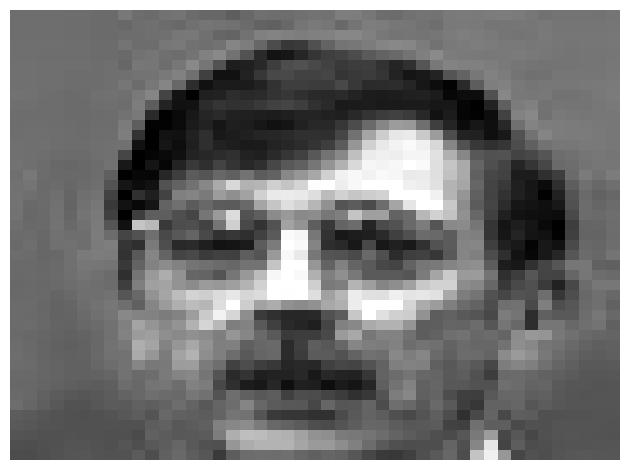

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [3]:
########## YOUR SOLUTION HERE ##########
pca = PCA().fit(data)
req_50 = np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.5).min() + 1
exp_var_50 = pca.explained_variance_ratio_[:req_50]
print(f'50%:\t{req_50}\n{exp_var_50}')

pca = PCA().fit(data)
req_75 = np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.75).min() + 1
exp_var_75 = pca.explained_variance_ratio_[:req_75]
print(f'75%:\t{req_75}\n{exp_var_75}')

pca = PCA().fit(data)
req_99 = np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.99).min() + 1
exp_var_99 = pca.explained_variance_ratio_[:req_99]
print(f'99%:\t{req_99}\n{exp_var_99}')

50%:	4
[0.26889478 0.13191195 0.06730198 0.04606538]
75%:	18
[0.26889478 0.13191195 0.06730198 0.04606538 0.03630817 0.03164298
 0.02929031 0.02328814 0.01893229 0.01621843 0.01557262 0.01304854
 0.01204164 0.01149976 0.00941469 0.00916721 0.00803153 0.00758796]
99%:	367
[2.68894776e-01 1.31911951e-01 6.73019790e-02 4.60653825e-02
 3.63081658e-02 3.16429762e-02 2.92903087e-02 2.32881383e-02
 1.89322933e-02 1.62184252e-02 1.55726232e-02 1.30485396e-02
 1.20416386e-02 1.14997609e-02 9.41469099e-03 9.16720862e-03
 8.03153425e-03 7.58795871e-03 7.27536988e-03 6.93194089e-03
 6.30702823e-03 6.26198787e-03 6.02669612e-03 5.79311060e-03
 5.42252494e-03 5.08643198e-03 4.95656752e-03 4.75194403e-03
 4.60653269e-03 4.25497926e-03 4.07760563e-03 3.82924571e-03
 3.68205608e-03 3.47807786e-03 3.39766242e-03 3.35849989e-03
 3.09811768e-03 3.02223488e-03 2.95502032e-03 2.86876941e-03
 2.80021263e-03 2.63395495e-03 2.62499337e-03 2.48039105e-03
 2.45473297e-03 2.37571282e-03 2.24342360e-03 2.18198763e

<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [4]:
########## YOUR SOLUTION HERE ##########
def decompress(pca=None, n_components=None, percentage=None, original_data=data, printit=True):
    if original_data is None:
        raise ValueError('Original Data should be passed')
    if not pca:
        pca = PCA().fit(original_data)
        if not n_components:
            if percentage:
                n_components = np.argwhere(pca.explained_variance_ratio_.cumsum() >= percentage).min() + 1
            else:
                raise ValueError('At least "percentage" or "n_components" should be passed')
        pca = PCA(n_components=n_components)
    fitter = pca.fit(original_data)
    compressed_data = fitter.transform(original_data)
    decompressed_data = fitter.inverse_transform(compressed_data)
    if printit:
        print(f'Original Data\n\tShape:\t{original_data.shape}')
        print(f'Decompressed Data\n\tShape:\t{decompressed_data.shape}\n{decompressed_data}\n')
    return original_data, compressed_data, decompressed_data
    
decompress(percentage=0.5, original_data=data)
decompress(percentage=0.75, original_data=data)
decompress(percentage=0.99, original_data=data)

Original Data
	Shape:	(3059, 2250)
Decompressed Data
	Shape:	(3059, 2250)
[[0.42840846 0.43059091 0.43091647 ... 0.3803441  0.39873523 0.39595697]
 [0.23631939 0.23651472 0.23589313 ... 0.22359975 0.28735771 0.32794481]
 [0.51343115 0.51558088 0.51575557 ... 0.41174681 0.3878874  0.3620779 ]
 ...
 [0.38330397 0.38472276 0.38627713 ... 0.2989653  0.33240726 0.33502243]
 [0.2472381  0.24740342 0.24664084 ... 0.25798399 0.31780704 0.36105979]
 [0.423452   0.42465822 0.42334757 ... 0.33008112 0.3170867  0.30851198]]

Original Data
	Shape:	(3059, 2250)
Decompressed Data
	Shape:	(3059, 2250)
[[0.40485383 0.40954794 0.40918764 ... 0.27365992 0.27351895 0.27844465]
 [0.17049794 0.16872234 0.16830059 ... 0.24885364 0.35546359 0.42386395]
 [0.44960229 0.45205323 0.4547276  ... 0.41677951 0.43367585 0.44429566]
 ...
 [0.4056987  0.40931924 0.41455436 ... 0.37073233 0.38264038 0.36810045]
 [0.24989034 0.25115511 0.24867692 ... 0.259408   0.30659463 0.33595298]
 [0.45739126 0.45852536 0.45571794 ..

(array([[0.43137255, 0.43137255, 0.43137255, ..., 0.35294118, 0.3372549 ,
         0.34117647],
        [0.16078431, 0.16470588, 0.16862745, ..., 0.04705882, 0.61960784,
         0.8       ],
        [0.45882353, 0.46666667, 0.47843137, ..., 0.36078431, 0.34117647,
         0.34117647],
        ...,
        [0.35294118, 0.35686275, 0.36862745, ..., 0.39215686, 0.40392157,
         0.40784314],
        [0.25882353, 0.25882353, 0.25098039, ..., 0.18039216, 0.22352941,
         0.24705882],
        [0.4627451 , 0.46666667, 0.47058824, ..., 0.42745098, 0.51372549,
         0.46666667]]),
 array([[-0.4802571 ,  1.9322592 ,  0.59685641, ..., -0.01230232,
         -0.02417743,  0.05349709],
        [ 7.25033484, -3.15456684, -0.53270773, ..., -0.06318031,
          0.0395296 ,  0.01986697],
        [-5.02782029,  3.95451573,  1.56885986, ..., -0.05203257,
         -0.0277453 , -0.1306469 ],
        ...,
        [-1.77007284, -2.69422936, -0.17952045, ...,  0.07136502,
          0.0382243 , -0

<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

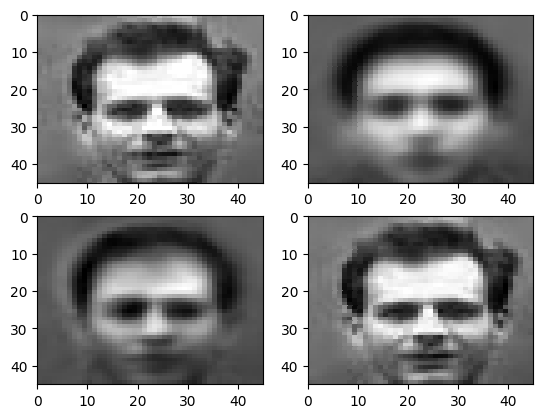

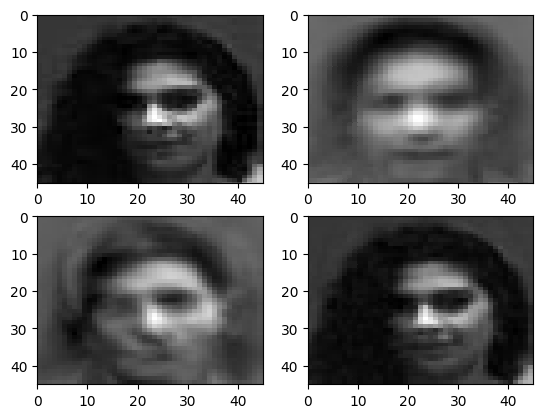

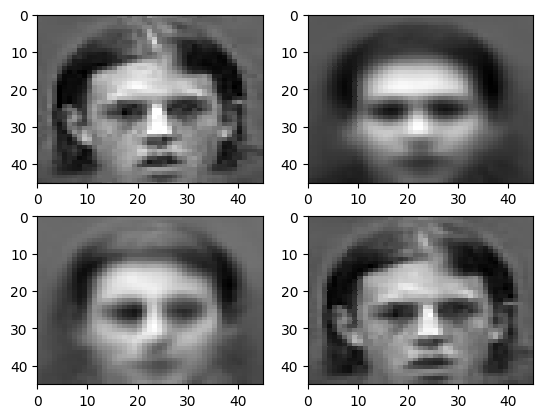

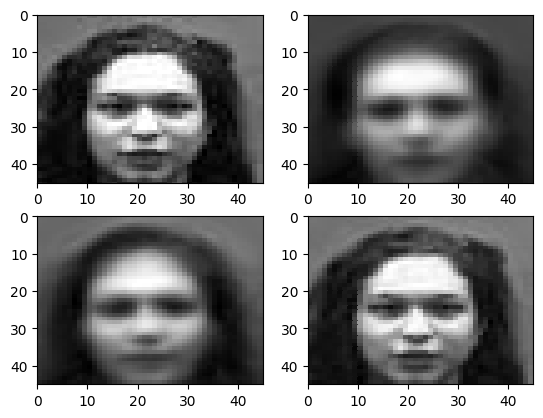

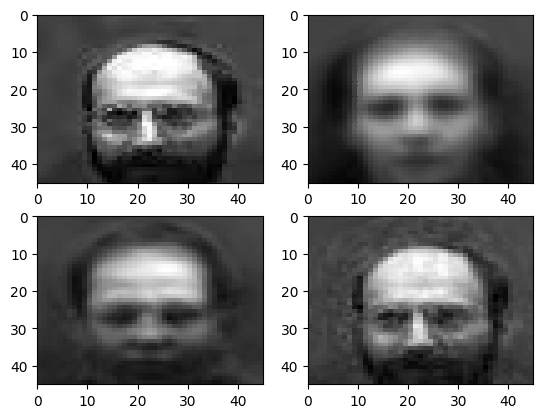

In [5]:
########## YOUR SOLUTION HERE ##########
import random

def plot_random_images(n=5, data=data):
    def plotImg(x, ax, title='Original'):
        ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
        ax.set_ylim([45, 0])
        
    for n in range(n):
        fig, axese = plt.subplots(2, 2)
        i, j = 0, 1
        idx = random.randint(0, len(data))
        for percent in [0.5, 0.75, 0.99]:
            orig_x, comp_x, decomp_x = decompress(percentage=percent, original_data=data, printit=False)
            plotImg(orig_x[idx,:], axese[0][0])
            plotImg(decomp_x[idx,:], axese[i][j], title=f'{percent*100}')
            axese[i,j].set_title = f'{percent*100}'
            if j < 1:
                j += 1
            else:
                j = 0
                i += 1
        plt.show()
    
plot_random_images(data=data)

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

########## YOUR SOLUTION HERE ##########
#### Aspects Lost due to compression [The More Compressed the Higher the Loss]:
* Shade of the faces
* Internal Outline od the hair
* Facial Expression / Shape of the mouth 
#### Aspects Preserved after compression:
* Outline of the Face
* Background shade
* Eye Shape
* Face Tilt / Orientation

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [6]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

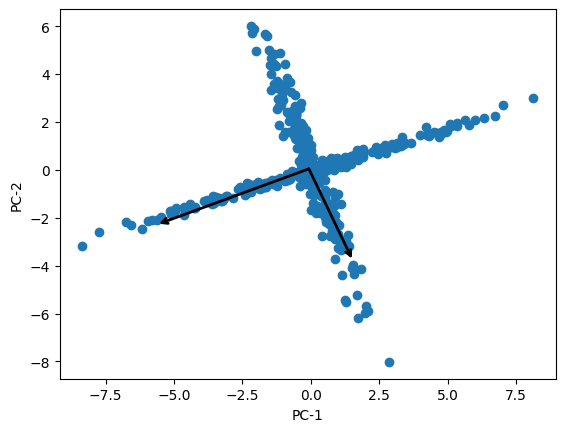

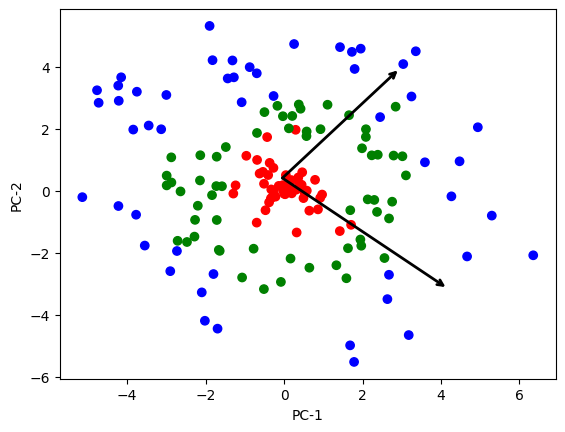

In [7]:
########## YOUR SOLUTION HERE ##########
def plot_data(data, pca, pca_mean, color=None, titlex=''):
    # plt.figure(figsize=(10, 10))
    if color:
        plt.scatter(data[:, 0], data[:, 1], color=color)
    else:
        plt.scatter(data[:, 0], data[:, 1])
    for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    # for length, vector in zip(exp_var_ratio, components): [Weird!!!]
        comp_vector = pca_mean + (vector * length * 10)
        plt.gca().annotate('', comp_vector, pca_mean, arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    plt.show()

    
# print(data3)
pca_data3 = PCA().fit(data3)
plot_data(data3, pca_data3, pca_data3.mean_, titlex='Data-3')

# print(data4)
data4_labels = data4[:, -1]
data4_inputs = data4[:, :-1]

data4_colors = []
for label in data4_labels:
    if label == 1:
        data4_colors.append('red')
    elif label == 2:
        data4_colors.append('green')
    else:
        data4_colors.append('blue')
        
pca_data4 = PCA().fit(data4[:, :-1])
plot_data(data4_inputs, pca_data4, pca_data4.mean_, color=data4_colors, titlex='Data-4')

<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

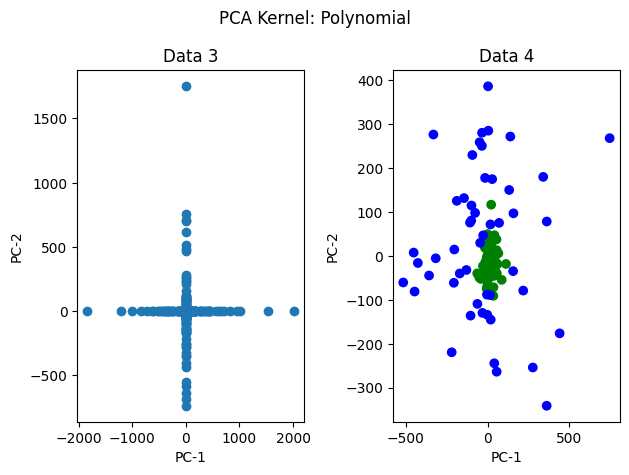

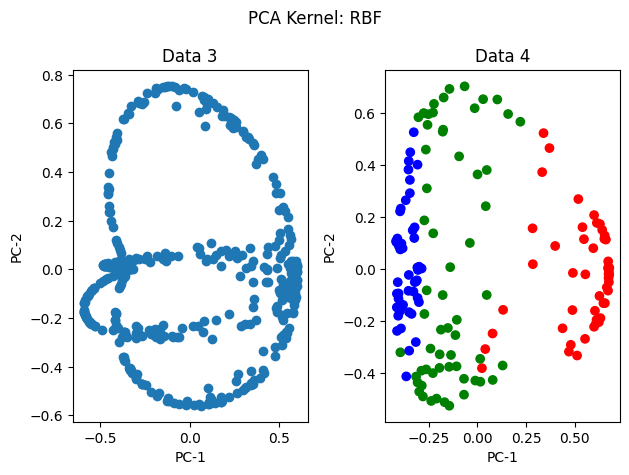

In [8]:
########## YOUR SOLUTION HERE ##########
def plot_kernels(data1, data2, title='Polynomial', color=None):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # fig.set_figheight(10)
    # fig.set_figwidth(10)
    # plt.figure(figsize=(10, 10))
    ax1.scatter(rb], data1[:, 1])
    ax2.scatter(data2[:, 0], data2[:, 1], color=color)
    
    ax1.set_title('Data 3')
    ax2.set_title('Data 4')
    ax1.set(xlabel="PC-1", ylabel="PC-2")
    ax2.set(xlabel="PC-1", ylabel="PC-2")
    
    fig.suptitle(f'PCA Kernel: {title}')
    fig.tight_layout()
    plt.show()


    
data4_labels = data4[:, -1]
data4_inputs = data4[:, :-1]
data4_colors = []
for label in data4_labels:
    if label == 1:
        data4_colors.append('red')
    elif label == 2:
        data4_colors.append('green')
    else:
        data4_colors.append('blue')
        
poly_pca3 = KernelPCA(gamma=2, degree=3, kernel='poly')
poly_transformed_data3 = poly_pca3.fit_transform(data3)

poly_pca4 = KernelPCA(gamma=2, degree=3, kernel='poly')
poly_transformed_data4 = poly_pca4.fit_transform(data4_inputs)

plot_kernels(poly_transformed_data3, poly_transformed_data4, 'Polynomial', color=data4_colors)



rbf_pca3 = KernelPCA(gamma=0.25, kernel='rbf')
rbf_transformed_data3 = rbf_pca3.fit_transform(data3)

rbf_pca4 = KernelPCA(gamma=0.25, kernel='rbf')
rbf_transformed_data4 = rbf_pca4.fit_transform(data4_inputs)

plot_kernels(rbf_transformed_data3, rbf_transformed_data4, 'RBF', color=data4_colors)

<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


########## YOUR SOLUTION HERE ##########
#### Advatantages of Kernel PCA over Linear PCA:
* Can capture Non-Linearity in the data [More Suitable for Image/Audio]
* More Flexible [Allows for using different kernels sequentially/in the same time]
* Capable of capturing hidden patterns in non-linear data [Since it projects information into higher dimensions first]
* More Suitable for Non-Linear Data "Data 4"

#### Advantages of Linear PCA over Kernel PCA:
* Better Performance [Doesn't compute kernels]
* Easier to implement [Less Hyperparameters to tune.]
* More Suitable for linear data "DATA 3"